## Features/Attributes

1. Rainfall
2. Temperature
3. Vegetation
4. Potential evapotranspiration
5. Length of growing period as a function of rainfall.
6. Soil storage
7. Soil scape
8. Soil type 
9. Current season 
10. Companion crops 
11. Time for plant to grow

Source: [How to determine the kinds of crops suitable to different types of soil? - ResearchGate](https://www.researchgate.net/post/How_to_determine_the_kinds_of_crops_suitable_to_different_types_of_soil)

## Classes/Labels/Crops

CEREALS

1. 	Rice 	
2. 	Jowar (Cholam) 	
3. 	Bajra (Cumbu) 	
4. 	Ragi 	


PULSES

9. 	Bengalgram 	
10. 	Redgram 	

Source: [Season and Crop Report of Tamil Nadu](http://www.tn.gov.in/crop/AreaProduction.htm)

which gives us 6 classes.

In [35]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification

In [89]:
X, y = make_classification(n_samples=(24*60*60*7), n_features=11, n_classes=6,n_informative=5, random_state=42)

In [90]:
pd.Series(y).value_counts()

0    100867
4    100823
5    100809
3    100804
2    100778
1    100719
dtype: int64

In [91]:
X.shape

(604800, 11)

In [92]:
df = pd.DataFrame(X)
df['class'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,10,class
0,0.687405,-0.719943,-1.124646,-1.412617,2.240557,0.192995,1.528824,1.692929,1.901612,-1.594434,0.498877,4
1,0.917788,2.848996,-1.489016,2.770083,1.114824,-2.413235,-3.046663,2.300900,-0.816607,2.284176,0.398095,3
2,1.160790,-2.013680,0.924814,1.218771,-0.177052,1.581274,-1.563474,-0.903991,-1.616714,-1.665230,1.850961,5
3,-0.353008,-0.256476,1.002065,-2.370473,0.372022,0.969807,-0.798014,1.131568,-0.503455,-1.200095,1.468985,4
4,1.069536,1.445395,0.437752,0.804685,1.178603,-0.972982,-0.705024,0.172195,0.351376,1.217496,0.320392,0


In [33]:
df.to_csv('kaala-init.csv', header=None, index=False)

## Building the model.

In [93]:
# helper tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# models
from sklearn.linear_model import LogisticRegression

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [95]:
model = LogisticRegression() # penalty='l1', tol = 0.001
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.47292493386243384

In [96]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.476364087302


In [97]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.810350529101


In [98]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.816079695767


In [99]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.871949404762


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (accuracy_score(y_test, y_pred))

In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)
X_dash = pca.transform(X)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_dash, y, test_size=0.2, random_state=69)

In [104]:
model = LogisticRegression() # penalty='l1', tol = 0.001
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.47239583333333335

In [105]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.885127314815


In [106]:
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

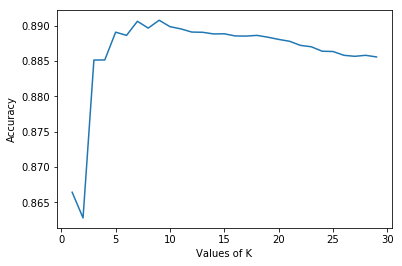

In [107]:
import matplotlib.pyplot as plt

# for plotting the graph inside the notebook itself
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Values of K')
plt.ylabel('Accuracy')

In [114]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.890757275132


In [115]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.880034722222


In [ ]:
1+2